<h1 align="center">Volume 3: Web Scraping 2</h1>
    <Name>
    <Class>
    <Date>

In [76]:
import re
import time
import requests
from bs4 import BeautifulSoup
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from matplotlib import pyplot as plt, rcParams
%matplotlib inline
# rcParams["figure.figsize"] = (16,12)    # Use this line to increase your figure size (optional).

## Problem 1
Modify `wunder_temp()` (below) so that it gathers the Actual Mean Temperature, Actual Max Temperature, and Actual Min Temperature for every day in July of 2012.
Plot these three measurements against time on the same plot.
Consider printing information at each iteration of the outer loop to keep track of the program’s progress.

Display the plot inline below.

In [2]:
# Problem 1
def wunder_temp(day="/history/airport/KSAN/2012/7/1/DailyHistory.html"):
    """Crawl through Weather Underground and extract temperature data."""
    # Initialize variables, including a regex for finding the 'Next Day' link.
    actual_mean_temp = []
    actual_max_temp = []
    actual_min_temp = []
    next_day_finder = re.compile(r"Next Day")
    base_url = "https://www.wunderground.com"       # Web page base URL.
    page = base_url + day                           # Complete page URL.
    current1 = None
    current2 = None
    current3 = None

    for _ in range(31):
        while current1 is None or current2 is None or current3 is None :  # Try downloading until it works.
            # Download the page source and PAUSE before continuing.
            page_source = requests.get(page).text
            time.sleep(1)           # PAUSE before continuing.
            soup = BeautifulSoup(page_source, "html.parser")
            current1 = soup.find(string="Mean Temperature")
            current2 = soup.find(string="Max Temperature")
            current3 = soup.find(string="Min Temperature")

        # Navigate to the relevant tag, then extract the temperature data.
        temp_tag_mean = current1.parent.parent.next_sibling.next_sibling.span.span
        temp_tag_max = current2.parent.parent.next_sibling.next_sibling.span.span
        temp_tag_min = current3.parent.parent.next_sibling.next_sibling.span.span
        actual_mean_temp.append(int(temp_tag_mean.string))
        actual_max_temp.append(int(temp_tag_max.string))
        actual_min_temp.append(int(temp_tag_min.string))

        # Find the URL for the page with the next day's data.
        new_day = soup.find(string=next_day_finder).parent["href"]
        page = base_url + new_day                   # New complete page URL.
        current1 = None
        current2 = None
        current3 = None
    
        print("July {} finished.".format(_+1))
    return actual_mean_temp , actual_max_temp , actual_min_temp

July 1 finished.
July 2 finished.
July 3 finished.
July 4 finished.
July 5 finished.
July 6 finished.
July 7 finished.
July 8 finished.
July 9 finished.
July 10 finished.
July 11 finished.
July 12 finished.
July 13 finished.
July 14 finished.
July 15 finished.
July 16 finished.
July 17 finished.
July 18 finished.
July 19 finished.
July 20 finished.
July 21 finished.
July 22 finished.
July 23 finished.
July 24 finished.
July 25 finished.
July 26 finished.
July 27 finished.
July 28 finished.
July 29 finished.
July 30 finished.
July 31 finished.


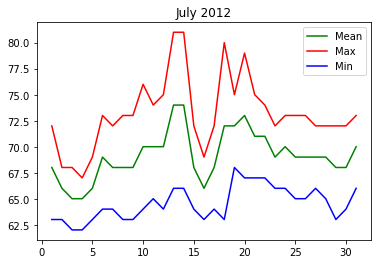

In [3]:
mean, maxs, mins = wunder_temp()
X = np.linspace(1,31,31)
plt.plot(X,mean,'-g',label='Mean')
plt.plot(X,maxs,'-r',label='Max')
plt.plot(X,mins,'-b',label='Min')
plt.legend(loc=1)
plt.title('July 2012')
plt.show()

## Problem 2

Modify `bank_data()` so that it extracts the total consolidated assets ("Consol Assets") for JPMorgan Chase, Bank of America, and Wells Fargo recorded each December from 2004 to the present.
In a single figure, plot each bank’s assets against time.
Be careful to keep the data sorted by date.

Display the plot inline below.

In [4]:
# Problem 2
def bank_data():
    """Crawl through the Federal Reserve site and extract bank data."""
    # Compile regular expressions for finding certain tags.
    link_finder = re.compile(r"(200[4-9]|201[0-6])$")
    date_string = re.compile(r"December 31, (?:200[4-9]|201[0-6]) ?$")
    chase_bank_finder = re.compile(r"^JPMORGAN CHASE BK")
    bank_of_america_finder = re.compile(r"^BANK OF AMER NA")
    wells_fargo_finder = re.compile(r"^WELLS FARGO BK NA")

    # Get the base page and find the URLs to all other relevant pages.
    base_url="https://www.federalreserve.gov/releases/lbr/"
    base_page_source = requests.get(base_url).text
    base_soup = BeautifulSoup(base_page_source, "html.parser")
    link_tags = base_soup.find_all(name='a', href=True, string=link_finder)
    pages = [base_url + tag.attrs["href"] for tag in link_tags]

    # Crawl through the individual pages and record the data.
    years = []
    chase_assets = []
    bofa_assets = []
    wells_assets = []
    for page in pages[::4]:
        time.sleep(1)               # PAUSE, then request the page.
        soup = BeautifulSoup(requests.get(page).text, "html.parser")

        # Find the tag corresponding to Chase Banks's consolidated assets.
        date_tag = soup.find(string=date_string)
        if date_tag == None : 
            print(soup.find(name="title"))
        else :
            temp_tag1 = soup.find(name="td", string=chase_bank_finder)
            temp_tag2 = soup.find(name="td", string=bank_of_america_finder)
            temp_tag3 = soup.find(name="td", string=wells_fargo_finder)
            for _ in range(10):
                temp_tag1 = temp_tag1.next_sibling
                temp_tag2 = temp_tag2.next_sibling
                temp_tag3 = temp_tag3.next_sibling
            # Extract the data, removing commas.
            years.append(int(date_tag.string[-5:]))
            chase_assets.append(int(temp_tag1.string.replace(',', '')))
            bofa_assets.append(int(temp_tag2.string.replace(',', '')))
            wells_assets.append(int(temp_tag3.string.replace(',', '')))

            print("Finished {}".format(years[-1]))
    return chase_assets , bofa_assets , wells_assets , years

Finished 2016
Finished 2015
Finished 2014
Finished 2013
Finished 2012
Finished 2011
Finished 2010
Finished 2009
Finished 2008
Finished 2007
Finished 2006
Finished 2005
Finished 2004


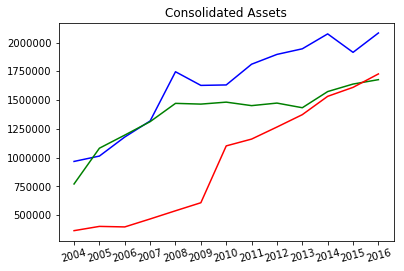

In [5]:
chase , bofa , wells , years = bank_data()
plt.plot(years,chase,'-b',label="Chase")
plt.plot(years,bofa,'-g',label="BofA")
plt.plot(years,wells,'-r',label="Wells")
plt.title("Consolidated Assets")
plt.xticks(years,rotation=15)
plt.show()

## Problem 3

ESPN hosts data on NBA athletes at http://www.espn.go.com/nba/statistics.
Each player has their own page with detailed performance statistics.
For each of the five offensive leaders in points and each of the five defensive leaders in rebounds, extract the player's career minutes per game (MPG) and career points per game (PPG).
Make a scatter plot of MPG against PPG for these ten players.

Display the plot inline below.

In [70]:
# Problem 3
def NBA() :
    off_string = re.compile(r"^Offensive Leaders$|.+")
    base_url = "http://www.espn.com/nba/statistics"
    base_page_source = requests.get(base_url).text
    base_soup = BeautifulSoup(base_page_source,"html.parser")
    points_tag = base_soup.find_all(name=['a','div'],string=off_string)
    off_leaders = []
    def_leaders = []
    for i in range(len(points_tag)) :
        if points_tag[i].string == "Offensive Leaders" :
            off_leaders = points_tag[i+1:i+6]
        elif points_tag[i].string == "Defensive Leaders" :
            def_leaders = points_tag[i+1:i+6]
        if(len(off_leaders) > 0 and len(def_leaders) > 0) :
            break
    career_string = re.compile(r"^Career$|.+")
    off_data = {}
    for leader in off_leaders :
        time.sleep(1)
        new_url = leader['href']
        leader_page = requests.get(new_url).text
        leader_soup = BeautifulSoup(leader_page,"html.parser")
        career_tag = leader_soup.find_all(name='td',string=career_string)
        for i in range(len(career_tag)) :
            if career_tag[i].string == "Career" and 'p' not in [tag.name for tag in career_tag[i].children] :
                off_data[leader.string] = {'MPG':career_tag[i+2].string,'PPG':career_tag[i+15].string}
                break
    def_data = {}
    for leader in def_leaders :
        time.sleep(1)
        new_url = leader['href']
        leader_page = requests.get(new_url).text
        leader_soup = BeautifulSoup(leader_page,"html.parser")
        career_tag = leader_soup.find_all(name='td',string=career_string)
        for i in range(len(career_tag)) :
            if career_tag[i].string == "Career" and 'p' not in [tag.name for tag in career_tag[i].children] :
                def_data[leader.string] = {'MPG':career_tag[i+2].string,'PPG':career_tag[i+15].string}
                break
    return off_data , def_data

def plot_NBA(off_data,def_data) :
    players = []
    MPG = []
    PPG = []
    for player in off_data.keys() :
        players.append(player)
        MPG.append(off_data[player]['MPG'])
        PPG.append(off_data[player]['PPG'])
    for player in def_data.keys() :
        players.append(player)
        MPG.append(def_data[player]['MPG'])
        PPG.append(def_data[player]['PPG'])
    
    inits = []
    for player in players : 
        first,last = player.split(' ')
        inits.append(first[0]+last[0])
    fig, ax = plt.subplots()
    ax.scatter(MPG,PPG)
    
    for i, plyr in enumerate(inits) :
        ax.annotate(plyr, (MPG[i],PPG[i]))
    plt.show()

In [72]:
off_data,def_data = NBA()

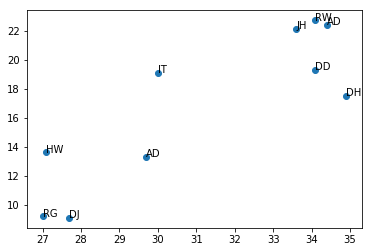

In [73]:
plot_NBA(off_data,def_data)

## Problem 4

The arXiv (pronounced "archive") is an online repository of scientific publications, hosted by Cornell University.
Write a function that accepts a string to serve as a search query.
Use Selenium to enter the query into the search bar of https://arxiv.org and press Enter.
The resulting page has up to 25 links to the PDFs of technical papers that match the query.
Gather these URLs, then continue to the next page (if there are more results) and continue gathering links until obtaining at most 100 URLs.

Print the list of URLs below.

In [113]:
# Problem 4
def search_arXiv(query) :
    base_url = 'https://arxiv.org'
    browser = webdriver.Chrome('./chromedriver')
    try :
        browser.get(base_url)
        try :
            search_bar = browser.find_element_by_name('query')
            search_bar.clear()
            search_bar.send_keys(str(query))
            search_bar.submit()
            papers = []
            soup = BeautifulSoup(browser.page_source,"html.parser")
            #print(soup.prettify)
            results = soup.find_all(name='a',string='pdf')
            while len(results) > 0 and len(papers) < 100 :
                for result in results :
                    papers.append(base_url+result['href'])
                next_button = soup.find_all(name='a',string='Next 25 results')
                if len(next_button) > 0 :
                    time.sleep(1)
                    browser.get(base_url+next_button[0]['href'])
                    soup = BeautifulSoup(browser.page_source,"html.parser")
                    results = soup.find_all(name='a',string='pdf')
                else :
                    results = []
        except NoSuchElementException:
            print("Could not find the search bar.")
            raise
    finally :
        browser.close()
    if len(papers) > 100 :
        papers = papers[:100]
    return papers

In [239]:
paps = search_arXiv("Rain")
print(len(paps))
print(len(set(paps)))
print(paps)

100
100
['https://arxiv.org/pdf/1710.01709', 'https://arxiv.org/pdf/1709.09321', 'https://arxiv.org/pdf/1709.06744', 'https://arxiv.org/pdf/1709.06564', 'https://arxiv.org/pdf/1709.05542', 'https://arxiv.org/pdf/1709.04907', 'https://arxiv.org/pdf/1709.04378', 'https://arxiv.org/pdf/1709.02989', 'https://arxiv.org/pdf/1709.00200', 'https://arxiv.org/pdf/1708.08559', 'https://arxiv.org/pdf/1708.08262', 'https://arxiv.org/pdf/1708.06982', 'https://arxiv.org/pdf/1708.05392', 'https://arxiv.org/pdf/1708.02765', 'https://arxiv.org/pdf/1707.08916', 'https://arxiv.org/pdf/1707.07721', 'https://arxiv.org/pdf/1707.07069', 'https://arxiv.org/pdf/1707.04932', 'https://arxiv.org/pdf/1707.00662', 'https://arxiv.org/pdf/1707.00223', 'https://arxiv.org/pdf/1706.09138', 'https://arxiv.org/pdf/1706.07412', 'https://arxiv.org/pdf/1706.06221', 'https://arxiv.org/pdf/1706.01804', 'https://arxiv.org/pdf/1706.00753', 'https://arxiv.org/pdf/1706.00214', 'https://arxiv.org/pdf/1705.10501', 'https://arxiv.org/

## Problem 5

Project Euler (https://projecteuler.net) is a collection of mathematical computing problems.
Each problem is listed with an ID, a description/title, and the number of users that have solved the problem.

Using Selenium, BeautifulSoup, or both, for each of the (at least) 600 problems in the archive at https://projecteuler.net/archives, record the problem ID and the number of people who have solved it.
Return a list of IDs, sorted from largest to smallest by the number of people who have solved them.
That is, the first entry in the list should be the ID of the most solved problem, and the last entry in the list should be the ID of the least solved problem.

Print the list of problems IDs below.

In [236]:
# Problem 5
def proj_euler() :
    base_url = "https://projecteuler.net/archives"
    ident = re.compile(r'(?<=<td class="id_column">)\d{1,3}(?=</td>)')
    solved = re.compile(r'(?<=<div style="text-align:center;">)\d+(?=</div>)')
    solved_by = {}
    for i in range(1,14) :
        if i == 1 :
            url = base_url
        else :
            url = base_url+';page={}'.format(i)
        time.sleep(1)
        page = requests.get(url).text
        soup = BeautifulSoup(page,'html.parser')
        table = soup.find(name='table',attrs={'id':'problems_table'})
        i = 0
        for child in table.children :
            if i <= 2 or isinstance(child,str):
                i = i + 1
                pass
            else :
                ind = int(re.findall(ident,str(child))[0])
                sol = int(re.findall(solved,str(child))[0])
                solved_by[ind] = sol
    solve = [k for k in sorted(solved_by.items(), key=lambda x : x[1], reverse=True)]
    return solve

In [238]:
sol = proj_euler()
print([prob[0] for prob in sol])

[1, 2, 3, 6, 5, 4, 7, 9, 8, 10, 11, 16, 13, 14, 12, 20, 15, 25, 17, 18, 21, 19, 22, 48, 24, 28, 30, 29, 23, 67, 34, 36, 27, 35, 31, 26, 40, 42, 37, 39, 33, 45, 32, 41, 52, 38, 50, 46, 53, 43, 56, 47, 49, 44, 55, 97, 79, 63, 92, 59, 57, 58, 54, 81, 69, 51, 99, 62, 65, 71, 76, 74, 60, 73, 61, 85, 112, 206, 70, 72, 89, 102, 64, 82, 87, 68, 80, 66, 77, 83, 75, 96, 145, 78, 104, 100, 91, 205, 124, 120, 95, 125, 108, 86, 84, 119, 116, 94, 123, 179, 187, 93, 113, 117, 98, 107, 101, 90, 114, 115, 121, 243, 88, 173, 203, 110, 109, 105, 103, 122, 204, 131, 191, 111, 357, 134, 118, 188, 132, 135, 106, 129, 144, 127, 174, 301, 130, 142, 164, 138, 231, 136, 139, 162, 133, 151, 214, 137, 235, 197, 148, 169, 146, 345, 207, 128, 183, 149, 225, 126, 265, 190, 211, 140, 216, 166, 493, 150, 347, 172, 215, 381, 387, 141, 323, 346, 303, 158, 155, 234, 267, 160, 178, 159, 277, 193, 218, 500, 315, 185, 230, 250, 147, 297, 186, 293, 348, 171, 157, 168, 182, 249, 143, 154, 209, 165, 152, 153, 196, 317, 202, 50